## Building a Simple Function-Based Text Preprocessing Pipeline
This function combines multiple preprocessing steps — from cleaning to lemmatization.
It’s modular, easy to modify, and ideal for early-stage projects.


In [ ]:
# Install required libraries (if not available)
!pip install nltk spacy --quiet
import nltk
import re
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Initialize components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
custom = ["simplify", "model"]  # custom/own stopwords

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs, punctuation, digits
    text = re.sub(r"http\S+|[^a-zA-Z\s]", "", text)

    # 3. Tokenize using spaCy
    doc = nlp(text)

    # 4. Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token.text) for token in doc if token.text not in stop_words and token.text not in custom and len(token.text) > 2]

    return tokens

# Example
sample_text = "NLP pipelines clean, normalize, and simplify text for better model performance!"
print(preprocess_text(sample_text))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['nlp', 'pipeline', 'clean', 'normalize', 'text', 'better', 'performance']


## Stepwise Output Visualization
We'll see how text transforms at each pipeline stage for better understanding.


In [ ]:
def demo_pipeline_steps(text):
    print(f"Original Text:\n{text}\n")

    lower = text.lower()
    print(f"After Lowercasing:\n{lower}\n")

    cleaned = re.sub(r"http\S+|[^a-zA-Z\s]", "", lower)
    print(f"After Removing URLs & Punctuation:\n{cleaned}\n")

    doc = nlp(cleaned)
    tokens = [token.text for token in doc]
    print(f"After Tokenization:\n{tokens}\n")

    filtered = [w for w in tokens if w not in stop_words]
    print(f"After Stopword Removal:\n{filtered}\n")

    lemmatized = [lemmatizer.lemmatize(w) for w in filtered]
    print(f"After Lemmatization:\n{lemmatized}\n")

demo_pipeline_steps("Running NLP pipelines can improve model accuracy in real-world scenarios!!!")


Original Text:
Running NLP pipelines can improve model accuracy in real-world scenarios!!!

After Lowercasing:
running nlp pipelines can improve model accuracy in real-world scenarios!!!

After Removing URLs & Punctuation:
running nlp pipelines can improve model accuracy in realworld scenarios

After Tokenization:
['running', 'nlp', 'pipelines', 'can', 'improve', 'model', 'accuracy', 'in', 'realworld', 'scenarios']

After Stopword Removal:
['running', 'nlp', 'pipelines', 'improve', 'model', 'accuracy', 'realworld', 'scenarios']

After Lemmatization:
['running', 'nlp', 'pipeline', 'improve', 'model', 'accuracy', 'realworld', 'scenario']



## Custom Transformer for Scikit-learn Pipelines
This class lets us plug the same preprocessing logic into vectorizers or classifiers.


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.pattern = re.compile(r"http\S+|[^a-zA-Z\s]")
        self.nlp = spacy.load("en_core_web_sm")

    def clean_text(self, text):
        text = text.lower()
        text = self.pattern.sub("", text)
        doc = self.nlp(text)
        tokens = [self.lemmatizer.lemmatize(t.text) for t in doc if t.text not in self.stop_words and len(t.text) > 2]
        return " ".join(tokens)

    def fit(self, X, y=None):
        return self  # No fitting needed for preprocessing

    def transform(self, X, y=None):
        return [self.clean_text(text) for text in X]

# Example
texts = ["NLP preprocessing pipelines standardize raw data!",
         "They make text cleaner, simpler, and model-friendly."]
preprocessor = TextPreprocessor()
cleaned_texts = preprocessor.transform(texts)
print(cleaned_texts)


['nlp preprocessing pipeline standardize raw data', 'make text cleaner simpler modelfriendly']


In [ ]:
from nltk.stem import LancasterStemmer

# Create an instance of the LancasterStemmer
stemlist = LancasterStemmer()

# Example words
words = ["running", "runner", "runs", "ran", "easily", "beautiful"]

# Stemming the words
stemmed_words = [stemlist.stem(word) for word in words]

print(f"Original words: {words}")
print(f"Stemmed words: {stemmed_words}")

Original words: ['running', 'runner', 'runs', 'ran', 'easily', 'beautiful']
Stemmed words: ['run', 'run', 'run', 'ran', 'easy', 'beauty']


## Visualizing Word Counts Before and After Preprocessing
Helps learners appreciate the impact of normalization and filtering.


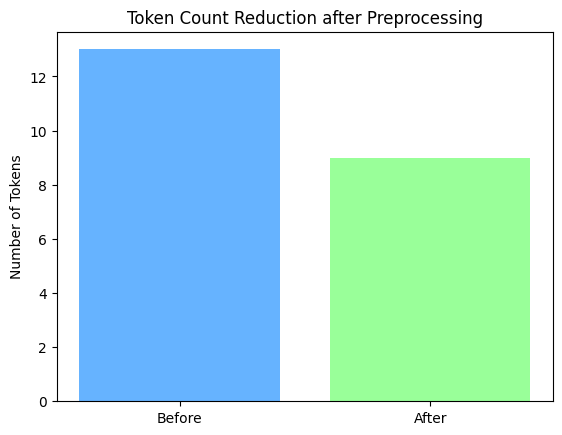

Before: 13 tokens
After: 9 tokens
Cleaned Text: quick brown fox jumping lazy dog learning nlp pipeline


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

raw_text = "The quick brown foxes are jumping over lazy dogs while learning NLP pipelines!!!"
cleaned_text = " ".join(preprocess_text(raw_text))

before = len(raw_text.split())
after = len(cleaned_text.split())

plt.bar(["Before", "After"], [before, after], color=["#66b3ff", "#99ff99"])
plt.title("Token Count Reduction after Preprocessing")
plt.ylabel("Number of Tokens")
plt.show()

print(f"Before: {before} tokens\nAfter: {after} tokens\nCleaned Text: {cleaned_text}")
